In [1]:
#TIME SERIES ANALYSIS 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#INTRODUCTION TO STATSMODELS LIBRARY

import statsmodels.api as sm

In [3]:
#GRABING A DATASET FROM STATSMODEL

df = sm.datasets.macrodata.load_pandas().data
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [4]:
#DESCRIPTION

print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [6]:
#DATES AS INDEX ( PANDAS )

index = pd.date_range(start="1959-01-01", end="2009-09-30", freq="QE")
df.index = index
df.head()


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


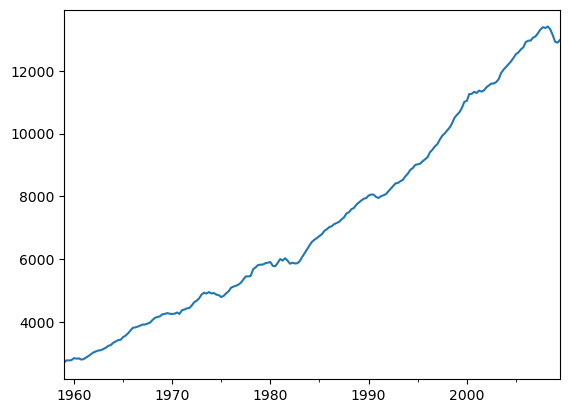

In [7]:
#GDP

df["realgdp"].plot()
plt.show()

In [11]:
#TREND : hfilter fonction qui renvoie un tuple et la trend

gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

In [14]:
df['trend']=gdp_trend

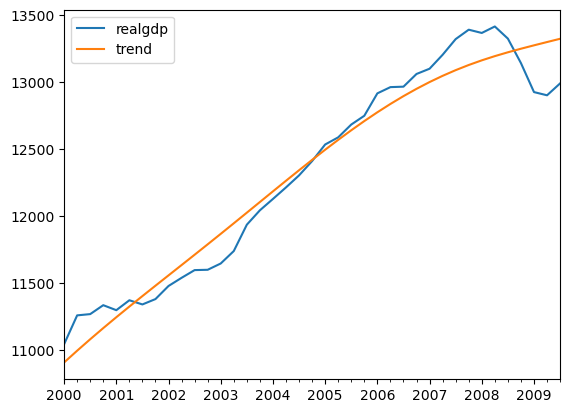

In [18]:
df[['realgdp', 'trend']]["2000-03-31":].plot()
plt.show()

In [13]:
#EWMA : We saw how to calculate SMA (simple moving average). EWMA is exponantially weightet moving average
#reduce the lag effect of the SMA - put more weight on the recent values.

#Lets create a EWMA Model

#First, we read the airline_passenger csv and plot the 6mths and 12mths SMA.

airline = pd.read_csv('airline_passengers.csv', index_col='Month')
airline.dropna(inplace=True)

In [20]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [23]:
airline['6MTHS SMA'] = airline['Thousands of Passengers'].rolling(6).mean()
airline['12MTHS SMA'] = airline['Thousands of Passengers'].rolling(12).mean()

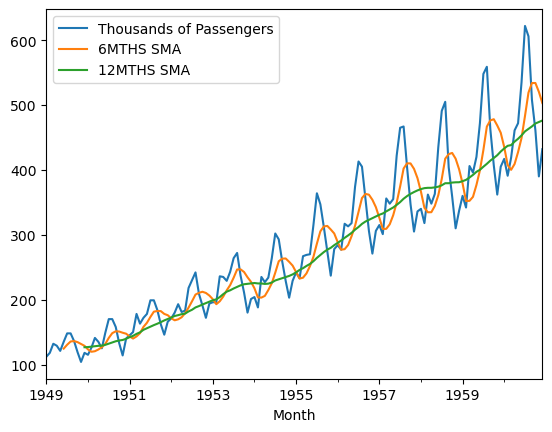

In [24]:
airline.plot()
plt.show()

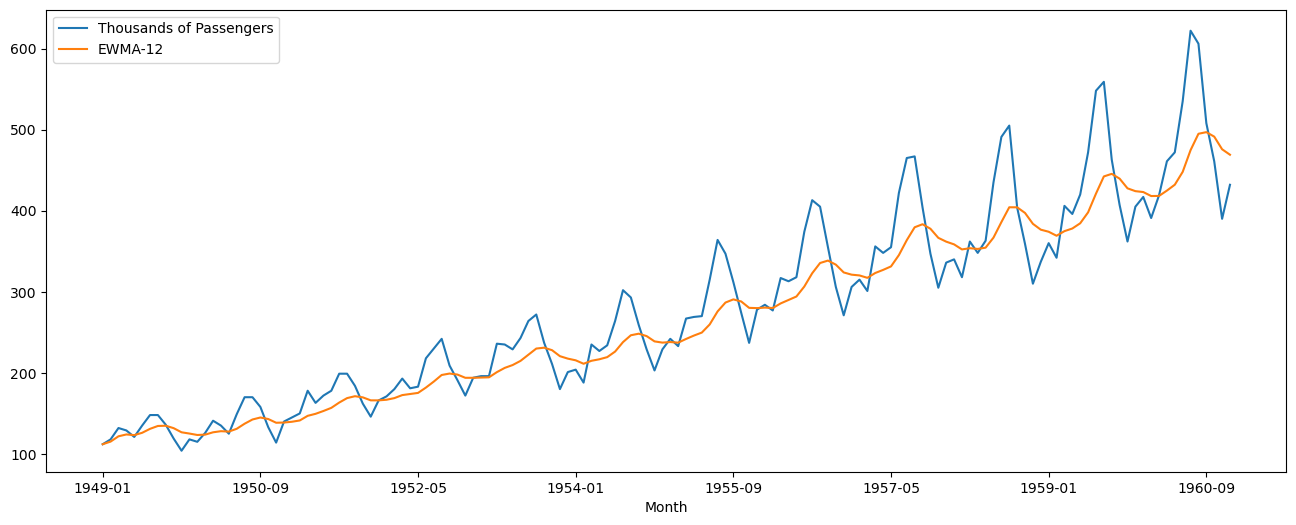

In [14]:
#EWMA : instead of rolling(), use ewm()

airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(16,6))
plt.show()